In [2]:
#Initializing libraries
import random, copy
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *

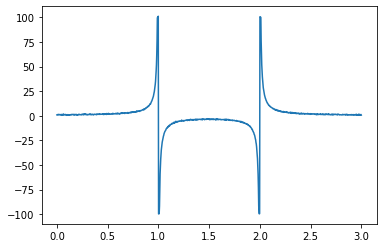

In [3]:
# Ex1
k = np.array([i for i in range(0, 1001)])
x = 3 * k / 1000
func = lambda x: 1 / (x ** 2 - 3 * x + 2)
y = func(x)

np.random.seed(12345)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(loc = 0.5, scale = 0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(loc = 0.5, scale = 0.25)
        else:
            y[i] += np.random.normal(loc = 0.5, scale = 0.25)

plt.plot(x,y)

In [4]:
#functions
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def least_squares(vector, func, x, y):
    a, b, c, d = vector
    return np.sum((func(x, a, b, c, d) - y) ** 2)

def least_squares_lm(vector, func, x, y):
    a, b, c, d = vector
    return func(x, a, b, c, d) - y

In [5]:
eps = 0.001
x0 = np.ones(4)

Optimization terminated successfully.
         Current function value: 135633.169192
         Iterations: 341
         Function evaluations: 576


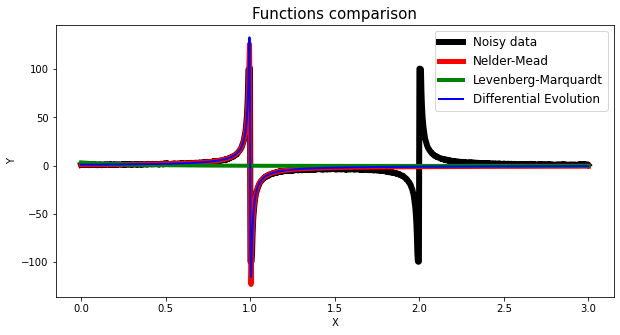

In [6]:
from scipy import optimize
#Nelder-Mead method
result_nm = optimize.minimize(least_squares, x0, method='nelder-mead', args=(rational_function, x, y), options={'disp': True, 'maxiter': 1000, 'fatol': eps})

#Levenberg-Marquardt method
x0 = np.ones(4)
result_lm = optimize.least_squares(least_squares_lm, x0, method='lm', args=(rational_function, x, y), ftol=eps)


#Differential Evolution method
bounds = np.array([[-2, 2], [-2, 2], [-2, 2], [-2, 2]])
result_de = optimize.differential_evolution(least_squares, bounds, args=(rational_function, x, y), tol=eps)

plt.figure(figsize=(10,5))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, 'black', label="Noisy data", linewidth=6)
plt.plot(x, rational_function(x, *result_nm.x), 'r', label="Nelder-Mead", linewidth=5)
plt.plot(x, rational_function(x, *result_lm.x), 'g', label="Levenberg-Marquardt", linewidth=4)
plt.plot(x, rational_function(x, *result_de.x), color='b', label="Differential Evolution", linewidth=2)
plt.legend(fontsize=12)

Stopping search: Swarm best objective change less than 0.001


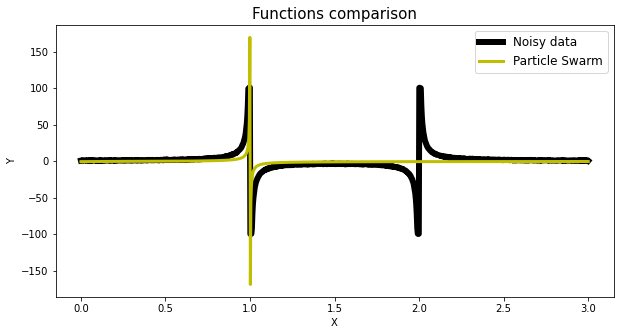

In [9]:
from pyswarm import pso
#Particle swarm method
lb = np.ones(4) * -1 #lower bound
ub = np.ones(4) #upper bound
xopt, fopt = pso(least_squares, lb, ub, maxiter=1000, args=(rational_function, x, y), swarmsize=1000, minfunc=eps)
result_pso = xopt

plt.figure(figsize=(10,5))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, 'black', label="Noisy data", linewidth=6)
plt.plot(x, rational_function(x, *result_pso), color='y', label="Particle Swarm", linewidth=3)
plt.legend(fontsize=12)

In [10]:
#TASK 2
#Data imported from: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html 
#Dataset used for this task: lau15_xy.txt
coordinates = np.asarray([
  [0.549963e-07,  0.985808e-08],
  [-28.8733,     -0.797739e-07],
  [-79.2916,      -21.4033],    
  [-14.6577,      -43.3896],    
  [-64.7473,       21.8982],    
  [-29.0585,      -43.2167],    
  [-72.0785,      0.181581],    
  [-36.0366,      -21.6135],    
  [-50.4808,       7.37447],    
  [-50.5859,      -21.5882],    
 [-0.135819,      -28.7293],    
  [-65.0866,      -36.0625],    
  [-21.4983,       7.31942],    
  [-57.5687,      -43.2506],    
  [-43.0700,       14.5548]])

def plot_map(coordinates):
    fig = plt.figure(figsize=(10,5))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], s=50, c='b', marker='o')
    return fig



In [11]:
def get_distance(p1, p2):
    return np.sqrt( np.sum( (p2 - p1)**2 ) )

def get_distmatrix(coordinates, r=0):
    distmatrix = np.ones((coordinates.shape[0], coordinates.shape[0]))

    for i, point1 in enumerate(coordinates):
        for j, point2 in enumerate(coordinates):
            distmatrix[i, j] = np.round(get_distance(point1, point2), r)
    return distmatrix

def get_track(sequence,  coordinates, plot=False):
    if plot:
        fig = plot_map(coordinates)
        
    distmatrix = get_distmatrix(coordinates, r=0)
    track = 0
    p_i = 0
    for i in range(len(sequence) + 1):
        try:
            p_j = sequence[i]
        except:
            p_j = 0
        track += distmatrix[p_i, p_j]
            
        if plot:
            plt.arrow(coordinates[p_i, 0], coordinates[p_i, 1], 
                         coordinates[p_j, 0] - coordinates[p_i, 0], coordinates[p_j, 1] - coordinates[p_i, 1], 
                     color='black', lw=0.002, width = 0.2)
        try:
            p_i = sequence[i]
        except:
            break
            
    if plot:
        plt.show()
        plt.close(fig)
    return track

# optimization
sequence = np.arange(1, 15)

T = 100000
Alpha = 0.999
X = np.random.permutation(sequence)

scores = []
i = 0
Z = 1000
while Z > 290:
    i += 1
    Z = get_track(X, coordinates)
    scores.append(Z)
    Xp = copy.deepcopy(X)
    a = random.sample(range(0, 14), 2)
    Xp[a[0]], Xp[a[1]] = Xp[a[1]], Xp[a[0]]
    Zp = get_track(Xp, coordinates, plot=False)
    
    deltaZ = Zp - Z
    Prob = np.exp(-deltaZ / T)
    if Zp < Z:
        X = Xp
        T = T*Alpha
    else:
        num = random.randint(0,1)
        if num < Prob:
            X = Xp
            T = T*Alpha


/var/folders/ky/fcbbxgqj4xbchr5qk956cd3r0000gn/T/ipykernel_24394/3776430794.py:60: RuntimeWarning: overflow encountered in exp
  Prob = np.exp(-deltaZ / T)


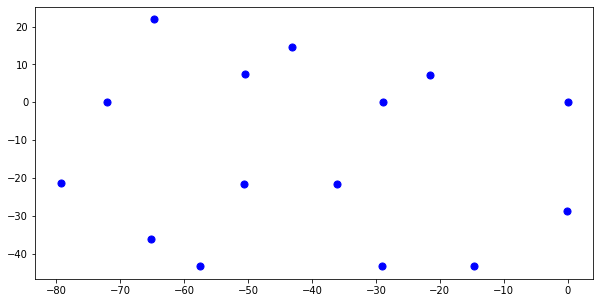

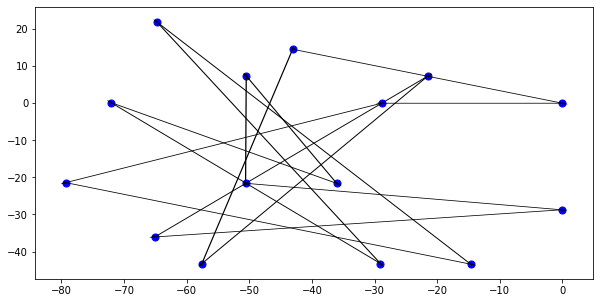

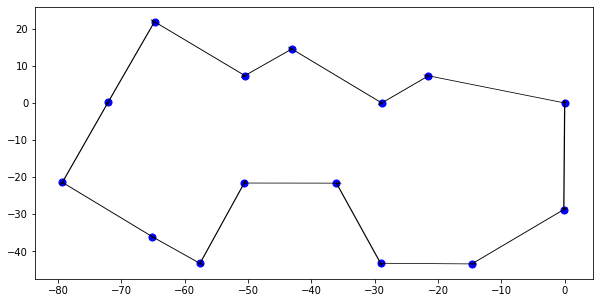

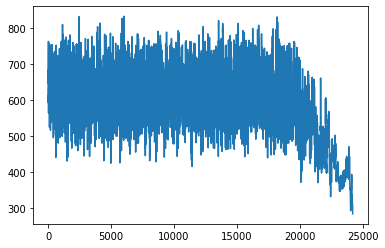

In [12]:

#GUI
root = Tk()
root.title("Track optimization")
root.geometry("300x200")


#buttons
btn1 = Button(text="coordinates map", background="#555", foreground="#ccc",
            padx="20", pady="8", font="16", command=plot_map(coordinates))
btn1.place(relx=.2, rely=.1, anchor="c", height=30, width=130, bordermode=OUTSIDE)
btn1.pack(fill=BOTH)
btn2 = Button(text="freetrack", background="#555", foreground="#ccc",
            padx="20", pady="8", font="16", command=get_track(np.arange(1, 15), coordinates, plot=True))
btn2.place(relx=.2, rely=.2, anchor="c", height=30, width=130, bordermode=OUTSIDE)
btn2.pack(fill=BOTH)
btn3 = Button(text="scores schedule", background="#555", foreground="#ccc",
            padx="20", pady="8", font="16", command=get_track(X, coordinates, plot=True))
btn3.place(relx=.2, rely=.3, anchor="c", height=30, width=130, bordermode=OUTSIDE)
btn3.pack(fill=BOTH)
btn4 = Button(text="optimized track", background="#555", foreground="#ccc",
            padx="20", pady="8", font="16", command=plt.plot(scores))
btn4.place(relx=.2, rely=.4, anchor="c", height=30, width=130, bordermode=OUTSIDE)
btn4.pack(fill=BOTH)

root.mainloop()
print()